In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#import the dataset 
iris= pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
# number of dat apoints and features
print(iris.shape) # rows and columns

(150, 6)


In [5]:
# remove the id column 
iris.drop("Id", axis=1, inplace=True)

In [6]:
# number of data points for each class
print(iris['Species'].value_counts())

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


### Machine Learning Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import normalize

In [8]:
# Converting Categorical to Numbers
iris.loc[iris['Species']=="Iris-setosa", 'Species']= 0
iris.loc[iris['Species']=="Iris-versicolor", 'Species']= 1
iris.loc[iris['Species']=="Iris-virginica", 'Species']= 2


In [9]:
# Spliting dataset into deatures and target
X=iris.iloc[:,0:4] # predictors
y=iris.iloc[:,4] # response variable


In [10]:
X = normalize(X) ##x-mean/std
y = np.array(y)
y = y.astype(int)

In [11]:
# Spliting data into train and test sets 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=1)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (135, 4)
X_test shape: (15, 4)
y_train shape: (135,)
y_test shape: (15,)


### DNN with 2 hidden layers and one output layer

In [12]:
from torch import optim
import torch
import torch.nn as nn

#### Architecture:
     Input layer:  4 Naurons
     1st Hidden layer: 27 Neurons
     2nd Hidden layer : 9 Neurons
     Output layer : 3 Neurons

#### Evalutation : 
      Criterion -> Log NLLLoss : Negative Log Likelihood Loss as a cost function telling us how bad it's performing, the lower the better
      Optimizer -> SGD : Stochastic Gradient Descent to update the weights
        

In [13]:
model = nn.Sequential(nn.Linear(4, 27), # 4 predictors
                      nn.ReLU(), # Activation Fct
                      nn.Linear(27,9), # hiden layer
                      nn.ReLU(),
                      nn.Linear(9,3), # output class
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
##criterion=nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [14]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=27, bias=True)
  (1): ReLU()
  (2): Linear(in_features=27, out_features=9, bias=True)
  (3): ReLU()
  (4): Linear(in_features=9, out_features=3, bias=True)
  (5): LogSoftmax()
)


In [15]:
# Predict fct that take input and return the predicted class
def predict(model,inputs):
    output=model(inputs)
    return output.data.numpy().argmax(axis=1)

In [16]:
#Making torch tensors base data that can be user for training
X_train=torch.from_numpy(np.asarray(X_train)).float()
X_test=torch.from_numpy(np.asarray(X_test)).float()
y_train=torch.from_numpy(np.asarray(y_train)).long()

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: torch.Size([135, 4])
X_test shape: torch.Size([15, 4])
y_train shape: torch.Size([135])
y_test shape: (15,)


In [17]:
epochs=1000
batch_size=15
n_batches=9
costs=[]
test_accuracies=[]
for e in range(epochs):
    running_loss=0
    for j in range(n_batches):
        #taking a batch of data for training
        # taking only 15 entries for
        Xbatch=X_train[j*batch_size:(j+1)*batch_size]
        Ybatch=y_train[j*batch_size:(j+1)*batch_size]
        
        # Gradients set to zero before starting
        optimizer.zero_grad()# accumultes the gradients on subsequent batch
        output= model(Xbatch) # forward propagation
        loss=criterion(output, Ybatch)# calculating the loss
        loss.backward() #performing backword propagation
        optimizer.step() # updateing the weight
        running_loss += loss.item() # finding the loss during this step
        
    Ypred=predict(model, X_test)
    acc= np.mean(y_test == Ypred)
    
    print("Epoch : %d, cost: %f, accuracy: %.2f"
         % (e, running_loss/n_batches , acc))
    
    costs.append(running_loss/n_batches)
    test_accuracies.append(acc)

Epoch : 0, cost: 1.109661, accuracy: 0.33
Epoch : 1, cost: 1.109277, accuracy: 0.33
Epoch : 2, cost: 1.108902, accuracy: 0.33
Epoch : 3, cost: 1.108538, accuracy: 0.33
Epoch : 4, cost: 1.108183, accuracy: 0.33
Epoch : 5, cost: 1.107837, accuracy: 0.33
Epoch : 6, cost: 1.107499, accuracy: 0.33
Epoch : 7, cost: 1.107170, accuracy: 0.33
Epoch : 8, cost: 1.106848, accuracy: 0.33
Epoch : 9, cost: 1.106535, accuracy: 0.33
Epoch : 10, cost: 1.106229, accuracy: 0.33
Epoch : 11, cost: 1.105931, accuracy: 0.33
Epoch : 12, cost: 1.105639, accuracy: 0.33
Epoch : 13, cost: 1.105355, accuracy: 0.33
Epoch : 14, cost: 1.105076, accuracy: 0.33
Epoch : 15, cost: 1.104805, accuracy: 0.33
Epoch : 16, cost: 1.104539, accuracy: 0.33
Epoch : 17, cost: 1.104280, accuracy: 0.33
Epoch : 18, cost: 1.104027, accuracy: 0.33
Epoch : 19, cost: 1.103779, accuracy: 0.33
Epoch : 20, cost: 1.103537, accuracy: 0.33
Epoch : 21, cost: 1.103299, accuracy: 0.33
Epoch : 22, cost: 1.103067, accuracy: 0.33
Epoch : 23, cost: 1.1

Epoch : 189, cost: 1.085101, accuracy: 0.60
Epoch : 190, cost: 1.084998, accuracy: 0.60
Epoch : 191, cost: 1.084896, accuracy: 0.60
Epoch : 192, cost: 1.084792, accuracy: 0.60
Epoch : 193, cost: 1.084689, accuracy: 0.60
Epoch : 194, cost: 1.084583, accuracy: 0.60
Epoch : 195, cost: 1.084478, accuracy: 0.60
Epoch : 196, cost: 1.084372, accuracy: 0.60
Epoch : 197, cost: 1.084266, accuracy: 0.60
Epoch : 198, cost: 1.084159, accuracy: 0.60
Epoch : 199, cost: 1.084051, accuracy: 0.60
Epoch : 200, cost: 1.083943, accuracy: 0.60
Epoch : 201, cost: 1.083834, accuracy: 0.60
Epoch : 202, cost: 1.083724, accuracy: 0.60
Epoch : 203, cost: 1.083614, accuracy: 0.60
Epoch : 204, cost: 1.083503, accuracy: 0.60
Epoch : 205, cost: 1.083391, accuracy: 0.60
Epoch : 206, cost: 1.083279, accuracy: 0.60
Epoch : 207, cost: 1.083165, accuracy: 0.60
Epoch : 208, cost: 1.083052, accuracy: 0.60
Epoch : 209, cost: 1.082937, accuracy: 0.60
Epoch : 210, cost: 1.082822, accuracy: 0.60
Epoch : 211, cost: 1.082706, acc

Epoch : 376, cost: 1.045165, accuracy: 0.60
Epoch : 377, cost: 1.044757, accuracy: 0.60
Epoch : 378, cost: 1.044344, accuracy: 0.60
Epoch : 379, cost: 1.043928, accuracy: 0.60
Epoch : 380, cost: 1.043509, accuracy: 0.60
Epoch : 381, cost: 1.043086, accuracy: 0.60
Epoch : 382, cost: 1.042660, accuracy: 0.60
Epoch : 383, cost: 1.042230, accuracy: 0.60
Epoch : 384, cost: 1.041796, accuracy: 0.60
Epoch : 385, cost: 1.041360, accuracy: 0.60
Epoch : 386, cost: 1.040919, accuracy: 0.60
Epoch : 387, cost: 1.040476, accuracy: 0.60
Epoch : 388, cost: 1.040028, accuracy: 0.60
Epoch : 389, cost: 1.039575, accuracy: 0.60
Epoch : 390, cost: 1.039120, accuracy: 0.60
Epoch : 391, cost: 1.038660, accuracy: 0.60
Epoch : 392, cost: 1.038196, accuracy: 0.60
Epoch : 393, cost: 1.037730, accuracy: 0.60
Epoch : 394, cost: 1.037257, accuracy: 0.60
Epoch : 395, cost: 1.036782, accuracy: 0.60
Epoch : 396, cost: 1.036301, accuracy: 0.60
Epoch : 397, cost: 1.035819, accuracy: 0.60
Epoch : 398, cost: 1.035332, acc

Epoch : 566, cost: 0.862770, accuracy: 0.60
Epoch : 567, cost: 0.861051, accuracy: 0.60
Epoch : 568, cost: 0.859313, accuracy: 0.60
Epoch : 569, cost: 0.857570, accuracy: 0.60
Epoch : 570, cost: 0.855821, accuracy: 0.60
Epoch : 571, cost: 0.854060, accuracy: 0.60
Epoch : 572, cost: 0.852296, accuracy: 0.60
Epoch : 573, cost: 0.850520, accuracy: 0.60
Epoch : 574, cost: 0.848741, accuracy: 0.60
Epoch : 575, cost: 0.846950, accuracy: 0.60
Epoch : 576, cost: 0.845157, accuracy: 0.60
Epoch : 577, cost: 0.843352, accuracy: 0.60
Epoch : 578, cost: 0.841545, accuracy: 0.60
Epoch : 579, cost: 0.839735, accuracy: 0.60
Epoch : 580, cost: 0.837906, accuracy: 0.60
Epoch : 581, cost: 0.836083, accuracy: 0.60
Epoch : 582, cost: 0.834249, accuracy: 0.60
Epoch : 583, cost: 0.832406, accuracy: 0.60
Epoch : 584, cost: 0.830553, accuracy: 0.60
Epoch : 585, cost: 0.828708, accuracy: 0.60
Epoch : 586, cost: 0.826850, accuracy: 0.60
Epoch : 587, cost: 0.824985, accuracy: 0.60
Epoch : 588, cost: 0.823117, acc

Epoch : 760, cost: 0.549460, accuracy: 0.67
Epoch : 761, cost: 0.548528, accuracy: 0.67
Epoch : 762, cost: 0.547602, accuracy: 0.67
Epoch : 763, cost: 0.546684, accuracy: 0.67
Epoch : 764, cost: 0.545775, accuracy: 0.67
Epoch : 765, cost: 0.544867, accuracy: 0.67
Epoch : 766, cost: 0.543972, accuracy: 0.67
Epoch : 767, cost: 0.543081, accuracy: 0.67
Epoch : 768, cost: 0.542198, accuracy: 0.67
Epoch : 769, cost: 0.541321, accuracy: 0.67
Epoch : 770, cost: 0.540450, accuracy: 0.67
Epoch : 771, cost: 0.539586, accuracy: 0.67
Epoch : 772, cost: 0.538728, accuracy: 0.67
Epoch : 773, cost: 0.537876, accuracy: 0.67
Epoch : 774, cost: 0.537031, accuracy: 0.67
Epoch : 775, cost: 0.536192, accuracy: 0.67
Epoch : 776, cost: 0.535359, accuracy: 0.67
Epoch : 777, cost: 0.534532, accuracy: 0.67
Epoch : 778, cost: 0.533711, accuracy: 0.67
Epoch : 779, cost: 0.532896, accuracy: 0.67
Epoch : 780, cost: 0.532087, accuracy: 0.67
Epoch : 781, cost: 0.531284, accuracy: 0.67
Epoch : 782, cost: 0.530484, acc

Epoch : 950, cost: 0.444572, accuracy: 0.87
Epoch : 951, cost: 0.444210, accuracy: 0.87
Epoch : 952, cost: 0.443849, accuracy: 0.87
Epoch : 953, cost: 0.443484, accuracy: 0.87
Epoch : 954, cost: 0.443124, accuracy: 0.87
Epoch : 955, cost: 0.442768, accuracy: 0.87
Epoch : 956, cost: 0.442409, accuracy: 0.87
Epoch : 957, cost: 0.442054, accuracy: 0.87
Epoch : 958, cost: 0.441699, accuracy: 0.87
Epoch : 959, cost: 0.441344, accuracy: 0.87
Epoch : 960, cost: 0.440990, accuracy: 0.87
Epoch : 961, cost: 0.440636, accuracy: 0.87
Epoch : 962, cost: 0.440283, accuracy: 0.87
Epoch : 963, cost: 0.439931, accuracy: 0.87
Epoch : 964, cost: 0.439580, accuracy: 0.87
Epoch : 965, cost: 0.439229, accuracy: 0.87
Epoch : 966, cost: 0.438878, accuracy: 0.87
Epoch : 967, cost: 0.438528, accuracy: 0.87
Epoch : 968, cost: 0.438179, accuracy: 0.87
Epoch : 969, cost: 0.437831, accuracy: 0.87
Epoch : 970, cost: 0.437483, accuracy: 0.87
Epoch : 971, cost: 0.437135, accuracy: 0.87
Epoch : 972, cost: 0.436788, acc

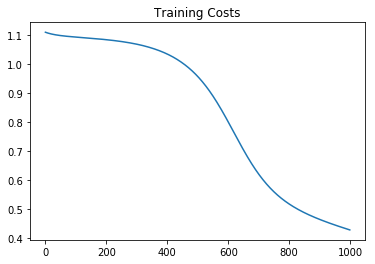

In [18]:
%matplotlib inline
plt.plot(costs)
plt.title("Training Costs")
plt.show()

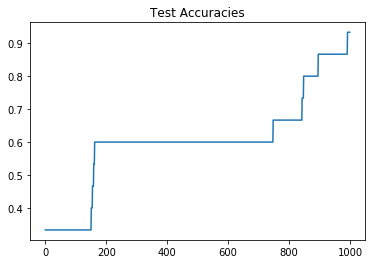

In [19]:
plt.plot(test_accuracies)
plt.title("Test Accuracies")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
ypred = predict(model, X_test)

print("Accuracy Score is {}".format(accuracy_score(y_test, ypred)))

Accuracy Score is 0.9333333333333333
